<a href="https://colab.research.google.com/github/MikyBorder/Aiffel_Quest/blob/main/ReuteurProject_%EA%B6%8C%EB%AF%B8%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import matplotlib
import seaborn
import numpy
import pandas
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.17.1
3.8.0
0.13.2
1.26.4
2.2.2
1.6.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import reuters

print('Border')

Border


In [3]:
(x_train,y_train), (x_test,y_test) = reuters.load_data(num_words=None, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print('train sample number:{}'.format(len(x_train)))
print('test smaple number:{}'.format(len(x_test)))


train sample number:8982
test smaple number:2246


In [5]:
num_classes = max(y_train)+1
print('Class number:{}'.format(num_classes))

Class number:46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


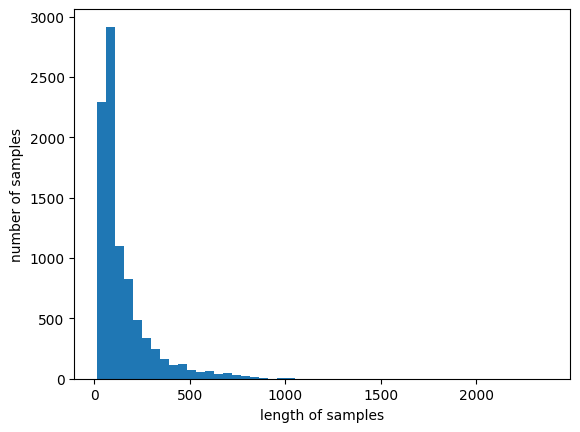

In [6]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

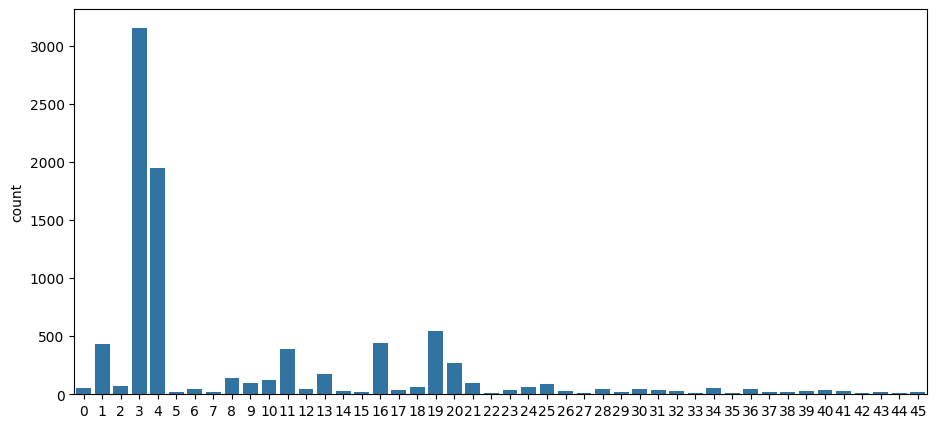

In [7]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

 데이터 복원하기

In [10]:
word_index = reuters.get_word_index(path="rueters_word_index.json")

print('Border')

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Border


In [12]:
index_to_word = {index+3: word for word, index in word_index.items()}

print(index_to_word[11683])

dog


In [13]:
for index, token in enumerate(("<pad>","<sos>","<unk>")):
    index_to_word[index]=token

print('Border')

Border


In [14]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [15]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

print(len(x_train))

8982


In [16]:
decoded =[]
for i in range(len(x_test)):
    t = ' '.join(index_to_word[index] for index in x_test[i])
    decoded.append(t)

x_test = decoded

print(len(x_test))

2246


In [17]:
x_train[:2]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3"]

In [18]:
x_test[:2]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

벡터화 하기

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

print('Border')

Border


In [20]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [21]:
tfidf_transfomer = TfidfTransformer()
tfidfv = tfidf_transfomer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


모델 학습 평가

In [22]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

print('Border')

Border


In [24]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

print('Border')

Border


In [26]:
voting_clf = VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                                          ('rf', RandomForestClassifier()),
                                          ('svm', SVC())],
                              voting='hard')

models["Voting"] = voting_clf

print('Border')

Border


In [28]:
num_words_list = [None, 5000, 2000, 10000, 15000]

print('Border')

Border


In [29]:
model_results = {}

In [30]:
for num_words in num_words_list:
     (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)


In [ ]:
for num_words in num_words_list:
    (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)


    results_for_num_words = {}


    decoded_x_train = [' '.join([index_to_word.get(index, '<UNK>') for index in sample]) for sample in x_train]
    decoded_x_test = [' '.join([index_to_word.get(index, '<UNK>') for index in sample]) for sample in x_test]


    x_train_dtm = dtmvector.fit_transform(decoded_x_train)
    x_test_dtm = dtmvector.transform(decoded_x_test)
    x_train_tfidf = tfidf_transfomer.fit_transform(x_train_dtm)
    x_test_tfidf = tfidf_transfomer.transform(x_test_dtm)


    for model_name, model in models.items():

        model.fit(x_train_tfidf, y_train)


        y_pred = model.predict(x_test_tfidf)


        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)


        results_for_num_words[model_name] = {
            'accuracy': accuracy,
            'classification_report': report
        }

    model_results[num_words] = results_for_num_words

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m